# Imports

In [1]:
import sys
import importlib
import pandas as pd
import numpy as np
import numpy.random as npr
from scipy.stats import zscore as zscore
import matplotlib.pyplot as plt
import ssm
from ssm.util import find_permutation
import connect_to_dj
from utils import set_rcParams
import queryBehavior as qb

npr.seed(0)

[2023-12-01 15:36:48,774][INFO]: Connecting ward5243user@vfsmphysiomdb01.fsm.northwestern.edu:3306
[2023-12-01 15:36:48,815][INFO]: Connected ward5243user@vfsmphysiomdb01.fsm.northwestern.edu:3306


Set up external storage at \\fsmresfiles.fsm.northwestern.edu\fsmresfiles\Basic_Sciences\Phys\PintoLab\_Dj_external
Set up external storage at \\fsmresfiles.fsm.northwestern.edu\fsmresfiles\Basic_Sciences\Phys\PintoLab\_Dj_external


# Set plotting params

In [34]:
set_rcParams.internationally_acclaimed_default_rcParams()

# Create DJ virtual module

In [2]:
VM = connect_to_dj.get_virtual_modules()

List of virtual modules:
['lab', 'subject', 'reference', 'procedure', 'behavior', 'session', 'eyetracking', 'pose_equipment', 'widefield_analysis', 'widefield', 'widefield_trial_df', 'equipment', 'twophoton', 'opto', 'testdb', 'pose_estimation', 'behavior_analysis', 'widefield_trial_dff']


# Fit GLM-HMM to one session of data

## Get one example session of towers data

In [3]:
performance = pd.DataFrame((VM['behavior'].Performance & 'subject_fullname = "jlt6316_DrChuck"' & 'task = "TowersTaskSwitch"').fetch())
performance.head(60)

,subject_fullname,session_date,session_number,task,protocol_id,main_maze_id,warmup_maze_id,all_maze_id,do_advance,proportion_correct,...,stim_bias,frac_good_trials_motor,frac_completed_trials,mean_excess_travel,num_trials,trials_per_min,total_reward_earned,reward_gain,total_num_trials,total_num_iter
0,jlt6316_DrChuck,2023-06-06,2,TowersTaskSwitch,10,"[[1.0], [2.0], [3.0], [4.0]]",None,"[[1.0], [2.0], [3.0], [4.0]]",1,"[[0.8], [1.0], [1.0], [0.9382239382239382]]",...,"[[nan], [nan], [nan], [nan]]","[[1.0], [1.0], [1.0], [0.9884169884169884]]","[[1.0], [1.0], [1.0], [1.0]]","[[-0.03734016713830154], [-0.16729321895674695...","[[10.0], [40.0], [80.0], [259.0]]","[[14.505953936154695], [12.570997721433327], [...",1.484,1.0,389,402066
1,jlt6316_DrChuck,2023-06-07,1,TowersTaskSwitch,10,[[4.0]],None,[[4.0]],1,[[0.872]],...,[[nan]],[[0.9973333333333333]],[[1.0]],[[-0.16585143212122155]],[[375.0]],[[8.901378303156246]],1.308,1.0,375,425980
2,jlt6316_DrChuck,2023-06-08,1,TowersTaskSwitch,10,[[5.0]],[[4.0]],"[[4.0], [5.0]]",1,"[[1.0], [0.8170731707317073]]",...,"[[nan], [nan]]","[[1.0], [0.9878048780487805]]","[[1.0], [1.0]]","[[-0.17058327362872786], [-0.1588013059621957]]","[[41.0], [164.0]]","[[8.530515499793738], [8.248766280061455]]",0.700,1.0,205,247902
3,jlt6316_DrChuck,2023-06-08,2,TowersTaskSwitch,10,[[11.0]],[[4.0]],"[[4.0], [11.0], [12.0]]",0,"[[1.0], [0.6388888888888888], [0.7469879518072...",...,"[[nan], [nan], [nan]]","[[1.0], [0.8333333333333334], [0.8915662650602...","[[1.0], [1.0], [1.0]]","[[-0.17431400164909308], [0.033106781974015224...","[[15.0], [144.0], [83.0]]","[[7.616715005316251], [5.35030145738841], [6.3...",1.014,1.5,242,421313
4,jlt6316_DrChuck,2023-06-09,1,TowersTaskSwitch,10,[[11.0]],[[4.0]],"[[4.0], [11.0], [12.0]]",0,"[[1.0], [0.74], [0.9130434782608695]]",...,"[[nan], [nan], [nan]]","[[1.0], [0.99], [1.0]]","[[1.0], [1.0], [1.0]]","[[-0.17155680202914766], [-0.1642313212613395]...","[[15.0], [200.0], [115.0]]","[[8.719043767744493], [7.764066758809384], [8....",1.608,1.5,330,423291
5,jlt6316_DrChuck,2023-06-12,1,TowersTaskSwitch,10,[[11.0]],[[4.0]],"[[4.0], [11.0], [12.0]]",0,"[[0.9444444444444444], [0.6698564593301436], [...",...,"[[nan], [nan], [nan]]","[[1.0], [0.9569377990430622], [0.9523809523809...","[[1.0], [1.0], [1.0]]","[[-0.16380310716287902], [-0.11813480305324513...","[[18.0], [209.0], [126.0]]","[[7.604406810357183], [6.493339681965097], [6....",1.620,1.5,353,538572
6,jlt6316_DrChuck,2023-06-13,1,TowersTaskSwitch,10,[[11.0]],[[4.0]],"[[4.0], [11.0], [12.0]]",0,"[[1.0], [0.8055555555555556], [1.0]]",...,"[[nan], [nan], [nan]]","[[1.0], [1.0], [1.0]]","[[1.0], [1.0], [1.0]]","[[-0.1701730701497943], [-0.1723558903038254],...","[[15.0], [216.0], [131.0]]","[[8.230560195292538], [8.009463670299267], [8....",1.920,1.5,362,435694
7,jlt6316_DrChuck,2023-06-14,1,TowersTaskSwitch,10,[[11.0]],[[4.0]],"[[4.0], [11.0], [12.0]]",0,"[[0.9444444444444444], [0.8585365853658536], [...",...,"[[nan], [nan], [nan]]","[[1.0], [1.0], [1.0]]","[[1.0], [1.0], [1.0]]","[[-0.16907322072574], [-0.17235231366005918], ...","[[18.0], [205.0], [124.0]]","[[7.474375484335207], [7.867809422420218], [7....",1.896,1.5,347,418989
8,jlt6316_DrChuck,2023-06-15,1,TowersTaskSwitch,10,[[11.0]],[[4.0]],"[[4.0], [11.0], [12.0]]",0,"[[1.0], [0.7351351351351352], [0.9642857142857...",...,"[[nan], [nan], [nan]]","[[1.0], [1.0], [1.0]]","[[1.0], [1.0], [1.0]]","[[-0.1661020255053069], [-0.17212606064708283]...","[[15.0], [185.0], [112.0]]","[[8.300887163771876], [6.481017045517944], [6....",1.554,1.5,312,455406
9,jlt6316_DrChuck,2023-06-16,1,TowersTaskSwitch,10,[[11.0]],[[4.0]],"[[4.0], [11.0], [12.0]]",0,"[[1.0], [0.7772277227722773], [0.9606299212598...",...,"[[nan], [nan], [nan]]","[[1.0], [1.0], [1.0]]","[[1.0], [1.0], [1.0]]","[[-0.16734171465606512], [-0.16856317929875744...","[[15.0], [202.0], [127.0]]","[[8.546177384590736], [7.883342346271266], [8....",1.764,1.5,344,427308


In [19]:
# Fetch restrictions
subject_fullname = 'jlt6316_DrChuck'
session_date     = '2023-06-20'
session_number   = 1
task             = 'TowersTaskSwitch'
maze_id          = 11
out_vars         = [
  'maze_id',
  'trial_type',
  'choice',
  'num_towers_left',
  'num_towers_right',
  'num_towers_delta',
  'trial_duration',
  'excess_travel',
  'mean_speed_stem',
  'block_performance',
  'is_first_trial_of_block']

restriction = qb.genQ(subject_fullname = subject_fullname, session_date = session_date, session_number = session_number, task = task, maze_id = maze_id, out_vars = out_vars)
trial_q     = qb.buildTrialQuery(restriction)

# Fetch data
data = pd.DataFrame(trial_q.fetch())
data = data.drop(data[data['choice'] == 'nil'].index)
data = data.reset_index(drop = True)
data

,subject_fullname,session_date,session_number,task,protocol_id,trial_id,maze_id,trial_type,choice,num_towers_right,num_towers_left,num_towers_delta,trial_duration,excess_travel,mean_speed_stem,block_performance,is_first_trial_of_block
0,jlt6316_DrChuck,2023-06-20,1,TowersTaskSwitch,10,16,11,L,L,1,4,-3,8.95946,-0.155833,59.2039,0.750000,1
1,jlt6316_DrChuck,2023-06-20,1,TowersTaskSwitch,10,17,11,L,R,2,4,-2,7.82561,-0.155717,65.6065,0.750000,0
2,jlt6316_DrChuck,2023-06-20,1,TowersTaskSwitch,10,18,11,L,R,3,10,-7,7.55062,-0.164314,59.1442,0.750000,0
3,jlt6316_DrChuck,2023-06-20,1,TowersTaskSwitch,10,19,11,L,L,1,5,-4,8.54246,-0.138767,58.7619,0.750000,0
4,jlt6316_DrChuck,2023-06-20,1,TowersTaskSwitch,10,20,11,L,L,2,7,-5,7.12581,-0.170842,64.4112,0.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,jlt6316_DrChuck,2023-06-20,1,TowersTaskSwitch,10,326,11,L,R,0,7,-7,7.08395,-0.168822,61.0476,0.111111,0
198,jlt6316_DrChuck,2023-06-20,1,TowersTaskSwitch,10,327,11,L,R,0,2,-2,7.92580,-0.163908,58.5789,0.111111,0
199,jlt6316_DrChuck,2023-06-20,1,TowersTaskSwitch,10,328,11,L,R,3,5,-2,7.79051,-0.169301,54.0097,0.111111,0
200,jlt6316_DrChuck,2023-06-20,1,TowersTaskSwitch,10,329,11,L,R,2,7,-5,8.56738,-0.167854,47.7390,0.111111,0


## Input Driven Observations ("GLM-HMM")

Compared to the model considered in the notebook ["2 Input Driven HMM"](https://github.com/lindermanlab/ssm/blob/master/notebooks/2%20Input%20Driven%20HMM.ipynb), Ashwood et al. (2020) assumes a stationary transition matrix where transition probabilities *do not* depend on external inputs. However, observation probabilities now *do* depend on external covariates according to:


for $c \neq C$:
$$
\begin{align}
\Pr(y_t = c \mid z_{t} = k, u_t, w_{kc}) = 
\frac{\exp\{w_{kc}^\mathsf{T} u_t\}}
{1+\sum_{c'=1}^{C-1} \exp\{w_{kc'}^\mathsf{T} u_t\}}
\end{align}
$$

and for $c = C$:
$$
\begin{align}
\Pr(y_t = c \mid z_{t} = k, u_t, w_{kc}) = 
\frac{1}
{1+\sum_{c'=1}^{C-1} \exp\{w_{kc'}^\mathsf{T} u_t\}}
\end{align}
$$

where $c \in \{1, ..., C\}$ indicates the categorical class for the observation, $u_{t} \in \mathbb{R}^{M}$ is the set of input covariates, and $w_{kc} \in \mathbb{R}^{M}$ is the set of input weights associated with state $k$ and class $c$. These weights, along with the transition matrix and initial state probabilities, will be learned.

In Ashwood et al. (2020), $C = 2$ as $y_{t}$ represents the binary choice made by an animal during a 2AFC (2-Alternative Forced Choice) task. The above equations then reduce to:

$$
\begin{align}
\Pr(y_t = 0 \mid z_{t} = k, u_t, w_{k}) = 
\frac{\exp\{w_{k}^\mathsf{T} u_t\}}
{1 + \exp\{w_{k}^\mathsf{T} u_t\}} = \frac{1}
{1 + \exp\{-w_{k}^\mathsf{T} u_t\}}.
\end{align}
$$

$$
\begin{align}
\Pr(y_t = 1 \mid z_{t} = k, u_t, w_{k}) = 
\frac{1}
{1 + \exp\{w_{k}^\mathsf{T} u_t\}}.
\end{align}
$$

and only a single weight vector, $w_{k}$, is associated with each state.

## Initialize GLM-HMM

In [20]:
# Set the parameters of the GLM-HMM
num_states     = 2    # number of discrete states
obs_dim        = 1    # number of observed dimensions
num_categories = 2    # number of categories for output
input_dim      = 2    # input dimensions

# Make a GLM-HMM
glmhmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
                   observation_kwargs=dict(C=num_categories), transitions="standard")

## Organise inputs

In [21]:
num_sess          = 1
input             = np.ones((num_sess, len(data), input_dim))
input[0, :, 1]    = data['num_towers_delta'].to_numpy(dtype=float)
# input[0, :, 0]    = zscore(data['num_towers_delta'].to_numpy(dtype=float), nan_policy='omit')
input             = list(input) 
chose_right       = np.zeros((len(data), 1))
chose_right[:, 0] = np.array((data['choice'] == 'R'))
chose_right       = chose_right.astype(int)
chose_right       = [chose_right]

## Fit GLM-HMM

In [22]:
N_iters = 200 # maximum number of EM iterations. Fitting with stop earlier if increase in LL is below tolerance specified by tolerance parameter
fit_ll = glmhmm.fit(chose_right, inputs=input, method="em", num_iters=N_iters, tolerance=10**-4)

  0%|          | 0/200 [00:00<?, ?it/s]

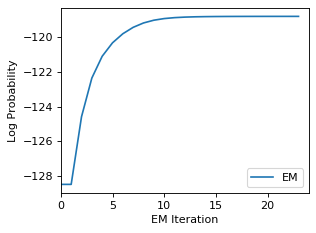

In [23]:
# Plot the log probabilities of the true and fit models. Fit model final LL should be greater 
# than or equal to true LL.
fig = plt.figure(figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fit_ll, label="EM")
plt.legend(loc="lower right")
plt.xlabel("EM Iteration")
plt.xlim(0, len(fit_ll))
plt.ylabel("Log Probability")
plt.show()

## Inferred latent states

In [24]:
glmhmm.most_likely_states(chose_right[0], input=input[0])

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [26]:
-glmhmm.observations.params

array([[[-0.1688747 ,  0.67499619]],

       [[ 1.95688797, -0.04026144]]])

## Transition probabilities

In [27]:
trans_mat = np.exp(glmhmm.transitions.log_Ps)
trans_mat

array([[0.95352899, 0.04647101],
       [0.24315364, 0.75684636]])

## Posterior state probabilities

In [28]:
# Get expected states:
posterior_probs = [glmhmm.expected_states(data=data, input=input)[0]
                for data, input
                in zip(chose_right, input)]

Text(0, 0.5, 'p(state)')

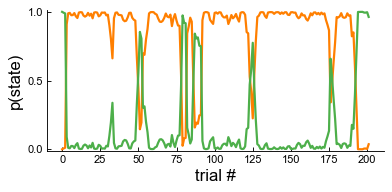

In [37]:
colors  = ['#ff7f00', '#4daf4a', '#377eb8']
fig     = plt.figure(figsize=(5, 2.5), dpi=80, facecolor='w', edgecolor='k')
sess_id = 0 #session id; can choose any index between 0 and num_sess-1
for k in range(num_states):
    plt.plot(posterior_probs[sess_id][:, k], label="State " + str(k + 1), lw=2,
             color=colors[k])
plt.ylim((-0.01, 1.01))
plt.yticks([0, 0.5, 1], fontsize = 10)
plt.xlabel("trial #", fontsize = 15)
plt.ylabel("p (state)", fontsize = 15)

## Fit GLM-HMM and perform recovery analysis: Maximum A Priori Estimation

Above, we performed Maximum Likelihood Estimation to retrieve the generative parameters of the GLM-HMM in simulated data. In the small data regime, where we do not have many trials available to us, we may instead want to perform Maximum A Priori (MAP) Estimation in order to incorporate a prior term and restrict the range for the best fitting parameters. Unfortunately, what is meant by 'small data regime' is problem dependent and will be affected by the number of states in the generative GLM-HMM, and the specific parameters of the generative model, amongst other things. In practice, we may perform both Maximum Likelihood Estimation and MAP estimation and compare the ability of the fit models to make predictions on held-out data (see Section 5 on Cross-Validation below).  

The prior we consider for the GLM-HMM is the product of a Gaussian prior on the GLM weights, $W$, and a Dirichlet prior on the transition matrix, $A$:

$$
\begin{align}
\Pr(W, A) &= \mathcal{N}(W|0, \Sigma) \Pr(A|\alpha) \\&= \mathcal{N}(W|0, diag(\sigma^{2}, \cdots, \sigma^{2})) \prod_{j=1}^{K} \dfrac{1}{B(\alpha)} \prod_{k=1}^{K} A_{jk}^{\alpha -1}
\end{align}
$$

There are two hyperparameters controlling the strength of the prior: $\sigma$ and $\alpha$.  The larger the value of $\sigma$ and if $\alpha = 1$, the more similar MAP estimation will become to Maximum Likelihood Estimation, and the prior term will become an additive offset to the objective function of the GLM-HMM that is independent of the values of $W$ and $A$.  In comparison, setting $\sigma = 2$ and $\alpha = 2$ will result in the prior no longer being independent of $W$ and $\alpha$.  

In order to perform MAP estimation for the GLM-HMM with `ssm`, the new syntax is:

```python
ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
             observation_kwargs=dict(C=num_categories,prior_sigma=prior_sigma),
             transitions="sticky", transition_kwargs=dict(alpha=prior_alpha,kappa=0))
```

where `prior_sigma` is the $\sigma$ parameter from above, and `prior_alpha` is the $\alpha$ parameter.

In [51]:
# Instantiate GLM-HMM and set prior hyperparameters
prior_sigma = 2
prior_alpha = 2
map_glmhmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
             observation_kwargs=dict(C=num_categories,prior_sigma=prior_sigma),
             transitions="sticky", transition_kwargs=dict(alpha=prior_alpha,kappa=0))

In [43]:
# Fit GLM-HMM with MAP estimation:
_ = map_glmhmm.fit(chose_right, inputs=input, method="em", num_iters=N_iters, tolerance=10**-4)

  0%|          | 0/200 [00:00<?, ?it/s]

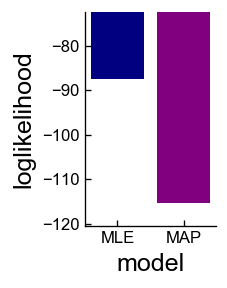

In [73]:
mle_final_ll = glmhmm.log_likelihood(chose_right, inputs=input) 
map_final_ll = map_glmhmm.log_likelihood(chose_right, inputs=input) 

# Plot these values
fig = plt.figure(figsize=(2, 2.5), dpi=120, facecolor='w', edgecolor='k')
loglikelihood_vals = [mle_final_ll, map_final_ll]
colors = ['Navy', 'Purple']
for z, occ in enumerate(loglikelihood_vals):
  plt.bar(z, occ, width = 0.8, color = colors[z])
  plt.ylim((map_final_ll-5, mle_final_ll+15))
  plt.xticks([0, 1], ['MLE', 'MAP'], fontsize = 10)
  plt.xlabel('model', fontsize = 15)
  plt.ylabel('loglikelihood', fontsize=15)

## Cross-validation

Use a few other sessions to test the performance for MLE and MAP results 

In [54]:
# Fetch restrictions
subject_fullname = 'jlt6316_DrChuck'
session_date     = ['2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-21']
session_number   = 1
task             = 'TowersTaskSwitch'
maze_id          = 11
out_vars         = [
  'maze_id',
  'trial_type',
  'choice',
  'num_towers_left',
  'num_towers_right',
  'num_towers_delta',
  'trial_duration',
  'excess_travel',
  'mean_speed_stem',
  'block_performance',
  'is_first_trial_of_block']

restriction = qb.genQ(subject_fullname = subject_fullname, session_date = session_date, session_number = session_number, task = task, maze_id = maze_id, out_vars = out_vars)
trial_q     = qb.buildTrialQuery(restriction)

# Fetch data
test_data = pd.DataFrame(trial_q.fetch())
test_data = data.drop(data[data['choice'] == 'nil'].index)
test_data = data.reset_index(drop = True)
test_data

,subject_fullname,session_date,session_number,task,protocol_id,trial_id,maze_id,trial_type,choice,num_towers_right,num_towers_left,num_towers_delta,trial_duration,excess_travel,mean_speed_stem,block_performance,is_first_trial_of_block
0,jlt6316_DrChuck,2023-06-13,1,TowersTaskSwitch,10,16,11,R,R,6,4,2,7.35911,-0.170506,68.8461,0.666667,1
1,jlt6316_DrChuck,2023-06-13,1,TowersTaskSwitch,10,17,11,L,R,2,8,-6,6.75064,-0.168209,68.2107,0.666667,0
2,jlt6316_DrChuck,2023-06-13,1,TowersTaskSwitch,10,18,11,L,L,0,13,-13,8.10891,-0.171068,54.6945,0.666667,0
3,jlt6316_DrChuck,2023-06-13,1,TowersTaskSwitch,10,19,11,L,L,3,9,-6,8.44240,-0.153793,56.7340,0.666667,0
4,jlt6316_DrChuck,2023-06-13,1,TowersTaskSwitch,10,20,11,R,R,5,1,4,6.76740,-0.170505,68.2641,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,jlt6316_DrChuck,2023-06-21,1,TowersTaskSwitch,10,340,11,L,L,1,5,-4,12.26620,-0.159522,33.3719,0.375000,0
1013,jlt6316_DrChuck,2023-06-21,1,TowersTaskSwitch,10,341,11,R,L,4,1,3,7.76941,-0.165514,56.5743,0.375000,0
1014,jlt6316_DrChuck,2023-06-21,1,TowersTaskSwitch,10,342,11,R,R,6,2,4,6.89839,-0.165494,68.2604,0.375000,0
1015,jlt6316_DrChuck,2023-06-21,1,TowersTaskSwitch,10,343,11,L,R,0,3,-3,5.67549,-0.172851,78.7039,0.375000,0


## Organise test inputs

In [55]:
num_sess               = 1
test_input             = np.ones((num_sess, len(test_data), input_dim))
test_input[0, :, 1]    = data['num_towers_delta'].to_numpy(dtype=float)
test_input             = list(test_input) 
test_chose_right       = np.zeros((len(test_data), 1))
test_chose_right[:, 0] = np.array((test_data['choice'] == 'R'))
test_chose_right       = test_chose_right.astype(int)
test_chose_right       = [test_chose_right]

## Compare likelihood of test_choices for model fit with MLE and MAP

In [64]:
mle_test_ll = glmhmm.log_likelihood(test_chose_right, inputs=test_input) 
map_test_ll = map_glmhmm.log_likelihood(test_chose_right, inputs=test_input) 

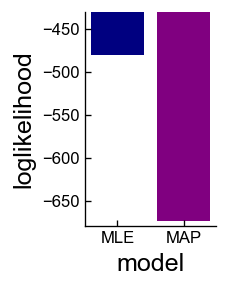

In [72]:
fig                     = plt.figure(figsize=(2, 2.5), dpi=120, facecolor='w', edgecolor='k')
test_loglikelihood_vals = [mle_test_ll, map_test_ll]
colors                  = ['Navy', 'Purple']
for z, occ in enumerate(test_loglikelihood_vals):
  plt.bar(z, occ, width = 0.8, color = colors[z])
  plt.ylim((map_test_ll-5, mle_test_ll+50))
  plt.xticks([0, 1], ['MLE', 'MAP'], fontsize = 10)
  plt.xlabel('model', fontsize = 15)
  plt.ylabel('loglikelihood', fontsize=15)